In [35]:
import pymc3 as pm
import theano.tensor as tt
import numpy as np
import scipy.stats as stats

from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize

In [53]:
p = 0.7
data = stats.bernoulli.rvs(0.8, size=10000)
print(data)

print(data.sum())
print(data.mean())

[1 0 1 ... 1 0 0]
7925
0.7925


In [54]:
with pm.Model() as model:
    p = pm.Uniform("p", 0, 1)
    observation = pm.Bernoulli("obs", p, observed=data)
    
    step = pm.Metropolis()
    # TODO: What are these args? (Explained in later chapters)
    trace = pm.sample(10000, tune=5000, step=step)

/Users/andrew.chang/miniconda3/lib/python3.8/site-packages/pymc3/sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [p]


Sampling 4 chains for 5_000 tune and 10_000 draw iterations (20_000 + 40_000 draws total) took 15 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [55]:
p_samples = trace["p"]
print(p_samples.shape)

(40000,)


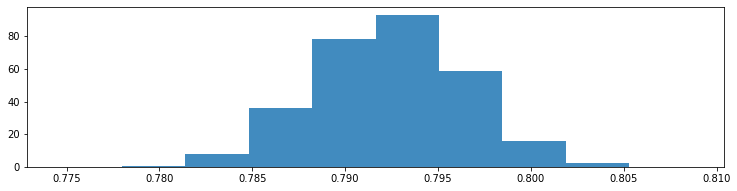

In [57]:
figsize(12.5, 10)

ax = plt.subplot(311)
#ax.set_autoscaley_on(False)

plt.hist(p_samples, histtype="stepfilled", density=True, alpha=0.85)
plt.show()